# Lista 3 - Algoritmos de Monte Carlo e Cadeira de Markov - CPS 767

**Aluno: ** Lucas Lopes Rolim  
**Curso: ** Engenharia de Computação e Informação  
**Professor: ** Daniel Ratton Figueiredo  
**Período: ** 2018.1

---


In [3]:
import urllib.request
import random
import string
import numpy as np
import math
from scipy.stats import expon
from scipy.stats import norm
import matplotlib.pyplot as plt
from decimal import *
import math
import warnings
warnings.filterwarnings('ignore')

## Questão 1
*Essa questão será baseada no artigo:Aproximaciones al valor de e. Esse artigo pode ser encontrado em http://www.famaf.unc.edu.ar/wp-content/uploads/2013/11/suma-de-uniformes.pdf*

### 1.

A variável aleatória que iremos utilizar consiste de uma soma de variáveis uniformes, tal como:

$$N = min{ \sum\limits_{i=1}^n U_i > 1 }$$

Ou seja, essa variável consiste no número de variáveis aleatórias uniformes que necessitamos gerar para somar mais que 1. Dessa forma, usando Monte Carlo, vamos fazer a seguinte aproximação:

$$e \sim \frac{min{\sum\limits_{i=1}^n U_i > 1 }}{N}$$

O valor esperado é dado por:

$$E[N] = \sum\limits_{i=1}^\infty \frac{1}{n!} = e$$

### 2.

Nossa v.a foi modelada como uma distribuição de Irwin–Hall, disso temos quer:

$$Var(N) = \frac{n}{12}$$

### 3.

In [213]:
def estimatorEuler(n):
    N = [] # N armazena o número de variáveis aleatórias que a iteração i levou para somar mais que 1
    i = 0 # Número de vezes iremos gerar a variável de Euler para depois tirar a média de N
    s = 0 # soma temporária de s na iteração i
    numbeOfUniforms = 0 # Número de uniformes que precisamos para somar mais de 1 na iteração i
    while i < n: ## Enquanto ainda não geramos n estimativas de Euler, continue...
        u = random.uniform(0, 1)
        s += u
        numbeOfUniforms +=1
        if(s > 1):
            s = 0
            N.append(numbeOfUniforms)
            numbeOfUniforms = 0
            i += 1
    return np.sum(N)/n

print("Estimativa com 10^7 rodadas: ",estimatorEuler(pow(10,7)))

Estimativa com 10^7 rodadas:  2.7184036


### 4.

##### 4.1 Erro Relativo

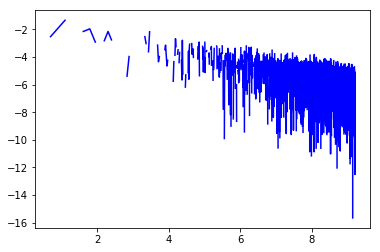

In [203]:
def relativeError(expected,found):
    return (expected-found)/expected

n = pow(10,4)
x_axis = list(range(2, n+1))
y_axis = []
for i in range(2,n+1):
    y_axis.append(relativeError(math.exp(1),estimatorEuler(i)))
plt.plot(np.log(x_axis), np.log(y_axis), 'b-')
plt.show()

##### 4.2 Standard Error

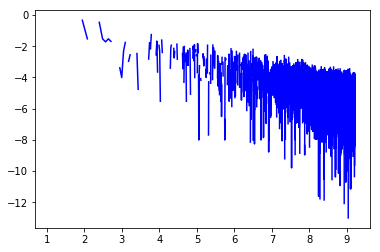

In [204]:
def standardError(expected,found):
    return (expected-found)

n = pow(10,4)
x_axis = list(range(2, n+1))
y_axis = []
for i in range(2,n+1):
    y_axis.append(standardError(math.exp(1),estimatorEuler(i)))
plt.plot(np.log(x_axis), np.log(y_axis), 'b-')
plt.show()

Em ambos os casos, podemos concluir que o valor do eixo y (log do erro) tende a cair conforme vamos aumentando o número de iterações n. Além disso, outro fato que pode ser percebido é que o *Standart Error* osclina menos e tem um comportamento mais presivível, se comparado ao erro relativo.

## Questão 2

### 1.

Temos que a CDF (*Cumulative Density Function*) da distribuição exponencial é dada por:

$$
F(x) = 1- e^{-\lambda x}
$$

Logo, podemos calcular sua inversa como sendo:

$$
F(u)^{-1} = \frac{-ln(u)}{\lambda}
$$

Portanto gerar amostras de uma v.a X com distribuição exponencial podemos usar a seguinte função:

In [205]:
def generateExponential(_lambda):
    u = random.uniform(0, 1)
    sample = (-np.log(u)/_lambda)
    return sample

### 2.

No caso de uma distribuição de pareto, sabemos que sua CDF é dada por:
    
$$
1 - (\frac{x_m}{x})^{\alpha}
$$

Fazendo a inversa dessa função, obtemos:

$$
F(u) = \frac{\lambda}{U^{\frac{1}{\alpha}}}
$$

In [206]:
def generatePareto(_lambda,alpha):
    u = random.uniform(0, 1)
    sample = (_lambda)/pow(u,(1/alpha))
    return sample

## Questão 3

#### 1.
Temos que:

$$
A_k = \text{número de domínios existentes com k ou menos letras (1)}\\
N_k = \text{número de possíveis domínios com k ou menos letras (2)}
$$

Definimos também uma função indicadora I que recebe uma string alfa e segue a seguinte regra:

$$
I(\alpha) = \begin{cases} 1, & \mbox{se }\mbox{ o domínio existe } \\ 0, & \mbox{se } \mbox{ o domínio www.[alpha].ufrj.br não existe} \end{cases}
$$

Por fim, definimos uma variável aleatória X será uma variável a qual assumirá o valor de uma string aleatória dentro do domínio possível do problema (2). Por consequência I(X), que usaremos na resolução do problema, também será uma variável aleatória, com distribuição binomial.

Seu valor esperado será dado por:

$$
E[I(X)] = \sum_{\alpha \in N_k} I(\alpha)P[X=\alpha] \\
 = \frac{1}{N_k} \sum_{\alpha \in N_k} I(\alpha) \\
 = \frac{A_k}{N_k}
$$

#### 2. 
A variância de I(x) será dada por:

$$
Var = E[X²] - E[X]² \\ 
 =  \frac{\sum_{\alpha \in N_k} I(\alpha)^2}{N_k} - \frac{A_k}{N_k} \\
$$

In [4]:
def checkURL(url):
    try:
        urllib.request.urlopen(url)
        return True
    except ValueError as ex:
        return False
    except urllib.request.URLError as ex:
        return False

def randomString(maxSize = 26):
    randomString = ''.join(random.choices(string.ascii_lowercase + ' ', k = maxSize)).replace(' ', '')
    return randomString

def randomVariable(k = 26):
    siteName = randomString(k)
    randomUrl = "http://www.{}.ufrj.br".format(siteName)
    randomVariable = checkURL(randomUrl)
    return randomVariable

def domainSize(k):
    size = 0
    for i in range(1,k+1):
        size += pow(26,i) # 26 come from alphabet size
    return size
    
def domainEstimator(iterations,k):
    results = []
    N = domainSize(k)
    getcontext().prec = 28
    for n in range(1,iterations + 1):
        s = 0
        for j in range (n + 1):
            s += randomVariable(k)
        estimator = Decimal(s)/Decimal(n)
        results.append(estimator * N)
    return results

In [6]:
n = pow(10,4)
x_axis = list(range(1, n+1))
y_axis = domainEstimator(n,4)
plt.plot(x_axis, y_axis, 'b-')
plt.show()

## Questão 4

In [44]:
def generateNormalSample():
    '''This method uses rejection sampling technique to generate samples with Normal distribution'''
    c = 1 / 0.4 # max g(x)/f(x)
    while True:
        random_sample_exp = expon.rvs(size = 1)[0]
        pdf_normal = norm.pdf(random_sample_exp)  # mean: 0, variance: 1
        pdf_exponential = expon.pdf(random_sample_exp) # lambda: 1
        uniform_sample = random.uniform(0, 1)
        if( uniform_sample <= pdf_normal/(c * pdf_exponential) ):
            signal = random.uniform(0, 1) 
            if(signal < 0.5):
                random_sample_exp = -random_sample_exp
            return random_sample_exp

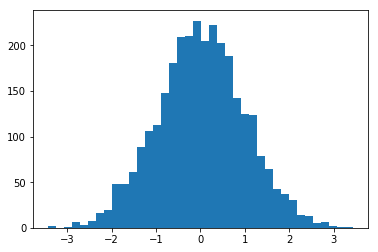

In [47]:
samples = []
for i in range(3000):
    samples.append(generateNormalSample())
plt.hist(samples, bins='auto') 
plt.show()

## Questão 5

### 1.

A nosa função h que vamos utilizar para definir nosso estimador é:

$$h(i) = \frac{i}{\frac{1}{n^2}}$$

In [ ]:
def secondMomentum(n,function):
    E_2 = 0
    for i in range(1, n+1):
        if(function == 'example'):
            h = i / ((n*(n+1)/2))
        elif(function == 'sumSquares'):
            h = pow(i,2)/ (pow(n,3)/3 + pow(n,2)/2 + n/6)
        elif(function == 'new'):
            h = i / ((n+1)/(n*n))
        E_2 += pow(i * np.log(i),2) /  h
    return E_2

print("O segundo momento do estimador é: ", secondMomentum(10000,'new'))

### 2.

Para plotar o gráfico utilizamos duas funções auxiliares: **calculateSum** e **estimator**. A primeira função calcula o valor exato da soma dos termos da função desejada, a segunda utiliza nossa função estimadora com objetivo de calcular o mesmo valor de forma aproximada. Por fim, utilizamos esses dois valores para plotar o gráfico de erro relativo, utilizando a seguinte relação:

$$ y = \mid  \frac{Gn - Gn_e}{Gn} \mid$$


In [ ]:
def calculateSum(n):
    s = 0
    for i in range(1,n+1):
        s =+ i * np.log(i)
    return s

def estimator(n):
    expected_value_h = 0
    for j in range(1,n+1):
        g = j * math.log(j)
        h = j / (1/(n*n))
        expected_value_h += (g/h)*h
    return expected_value_h / n

## Questão 6

Para resolver esse problema iremos adotar a estratégia de criar um vetor com todos os elementos do nosso conjunto n e então permutar as suas posições de acordo com escolhas aleatórias, possibilitadas pelo uso de uma distribuição uniforme.

In [58]:
def generateSubset(n,k):
    sample = []
    
    # create a list of elements 
    for i in range(n):
        sample.append(i)
        
    ## shuffle the elements    
    for i in range(1,n+1):
        index = int(random.uniform(0, n-i))
        tmp =  sample[index]
        sample[index] = sample[n-i]
        sample[n-i] = tmp
        
    return sample[:k]

## Questão 7

### 1.

Vamos adotar a abordagem mais simples possível do método de Monte Carlo. Iremos gerar **n** amostras com a distribuição **P** dada e então iremos comparar os valores gerados com o valor x de cauda que buscamos. Feito isso, definimos o valor do nosso estimador dividindo o número de valores gerados maiores ou iguais a x pelo total de amostras geradas.

In [171]:
def generateSample(sample_name):
    if sample_name == 'normal':
        return norm.rvs(size = 1)[0]
    elif sample_name == 'exponential':
         expon.rvs(size = 1)[0]
    elif sample_name == 'uniform':
         random.uniform(0, 1)
    else:
        print('error')
        return None

def probTail(samplesToTest,x,distribution):
    i = 0
    samplesOnTail = 0
    while i <= samplesToTest:
        sample = generateSample('normal')
        if(sample >= x):
            samplesOnTail += 1
        i += 1
    estimator = samplesOnTail/samplesToTest
    return estimator

### 2.

Temos que nosso estimador é composto pela média da soma de variáveis indicadoras, pois a cada amostra gerada verificamos se o valor está ou não na cauda desejada. Dessa forma, nossa variância será dada por:

$$var(X) = P(A) (1-P(A))$$

In [209]:
def var_est(p):
    return p*(1-p)

p = probTail(10000,0,'normal')
print("Variância sem Importance Sampling ",var_est(p))

Variância sem Importance Sampling  0.24999936


### 3.

In [211]:
random.seed(161095) 
def probTail_IS(samplesToTest,x,distribution):
    samplesOnTail = 0
    i = 0
    while i <= samplesToTest:
        sample = generateSample('normal')
        h =  1 / sample
        if(sample >= x):
            samplesOnTail += 1 / h
        i += 1
    estimator = samplesOnTail/samplesToTest
    return estimator

p = probTail_IS(10000,0,'normal')
print("Variância com Importance Sampling ",var_est(p))

Variância com Importance Sampling  0.23987907174
